ДЗ. <b>Работа с изображениями. Аугментация изображения.</b>
1. 100 изображений целевого класса. 100 изображений не целевого класса. Размер изображений 256*256.
2. Аугментация изображения (вращение, растяжение, сжатие, увеличение, уменьшение, движение)
Для решения данной задачи мы будем использовать ImageDataGenerator - которове решение из tensorflow.keras.preprocessing.image а так же некоторые другие элементы из tensorflow.keras.preprocessing (сохранение)

Аугментация изображения необходима нам в тех случаях когда размер обучаемой выборки слишком мал и мы хотим обучить модель на большем объеме данных чем у нас есть на самом деле в наличии. То есть мы берем какое то изображения после чего пропускаем его n раз через функцию которая случайным образом изменяет наше изображения, в данном примере такой функцией выступает ImageDataGenerator.

<b>ImageDataGenerator позволяет изменять:</b>
1. rotation_range - поворот изображения на угол (случайный угол в диапозоне)
2. width_shift_range, height_shift_range смещения изображения по вертикали горизонту
3. bright_range сдвиг яркости
3. zoom_range увеличение изображения и т.д. Подробнее в справке.

In [3]:
import os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base_dir = 'test'

In [3]:
car_dir = os.path.join(base_dir, 'car')
nokar_dir = os.path.join(base_dir, 'nokar')


In [4]:
datagen_range = ImageDataGenerator( #поворот изображения на угол 0-80
      rotation_range=80,
      horizontal_flip=True,
      fill_mode='nearest')
datagen_shift = ImageDataGenerator( #смещения изображения в долях ширины и высоты
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
datagen_zoom = ImageDataGenerator( # уменьшение или увеличение изображения в долях
      shear_range=0.5, #ротация белого
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

По сути можно сделать ImageDataGenerator любой сложности комбинируя различные его параметры. 

In [63]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

s=0
fnames = [os.path.join(car_dir, fname) for fname in os.listdir(car_dir)]
for img_path in fnames:

    
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
# Reshape (1, 256, 256, 3)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen_range.flow(x, batch_size=1):

        image.save_img('test/car1/'+str(s)+'.png', image.array_to_img(batch[0]))
        #i += 1
        #if i % 2 == 0: 
        #    break
      
        
        break
    for batch in datagen_shift.flow(x, batch_size=1):

        image.save_img('test/car2/'+str(s)+'.png', image.array_to_img(batch[0]))
        #i += 1
        #if i % 2 == 0: 
        #    break
      
       
        break
    for batch in datagen_zoom.flow(x, batch_size=1):

        image.save_img('test/car3/'+str(s)+'.png', image.array_to_img(batch[0]))
        #i += 1
        #if i % 2 == 0: 
        #    break
      
        s+=1
        break
    s+=1

In [64]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

s=0
fnames = [os.path.join(nokar_dir, fname) for fname in os.listdir(nokar_dir)]
for img_path in fnames:

    
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
# Reshape (1, 256, 256, 3)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen_range.flow(x, batch_size=1):

        image.save_img('test/nokar1/'+str(s)+'.png', image.array_to_img(batch[0]))
        #i += 1
        #if i % 2 == 0: 
        #    break
      
      
        break
    for batch in datagen_shift.flow(x, batch_size=1):

        image.save_img('test/nokar2/'+str(s)+'.png', image.array_to_img(batch[0]))
        #i += 1
        #if i % 2 == 0: 
        #    break
      
      
        break
    for batch in datagen_zoom.flow(x, batch_size=1):

        image.save_img('test/nokar3/'+str(s)+'.png', image.array_to_img(batch[0]))
        #i += 1
        #if i % 2 == 0: 
        #    break
      
      
        break
    s+=1

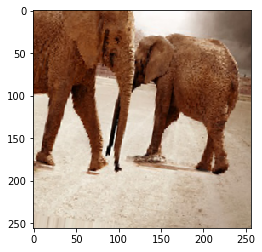

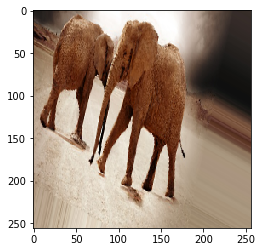

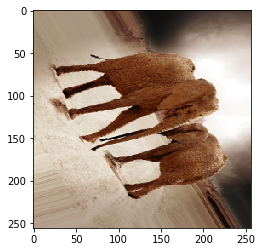

In [17]:
#в качестве примера мы возьмем 1 изображения и сделаем из него 3 новых.
datagen_range_new = ImageDataGenerator( #поворот изображения на угол 0-80
      rotation_range=80,
      horizontal_flip=True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.5,
      zoom_range=0.5,
      fill_mode='nearest')
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(nokar_dir, fname) for fname in os.listdir(nokar_dir)]
img_path=fnames[5]

img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
# Reshape (1, 256, 256, 3)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen_range_new.flow(x, batch_size=1):
        
        plt.figure(i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 3 == 0:
            break
       
plt.show()      
        


### Выводы: 
1 Аугментация изображения позволяет увеличить размер входного сета изображения. Размер выборки.<br>
2 Аугментация не увеличивает объем информации.


---

## Дальше уже не ДЗ.

Ну а теперь мы просто обязаны обучить модель...) 


---

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
        'test/train',
        target_size=(256, 256),
        batch_size=32,
       
        class_mode='binary')
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.


Found 3867 images belonging to 2 classes.


In [22]:
test_generator = test_datagen.flow_from_directory(
        'test/test',
        target_size=(256, 256),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 1801 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 256, 256, 3)
labels batch shape: (32,)


In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks_list = [
    EarlyStopping(
        monitor='val_acc',
        patience=3),
    ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True,)
]

In [41]:
history = model.fit_generator(
      
      train_generator,
      steps_per_epoch=100, # это много
      epochs=30,
      validation_data=test_generator,
      validation_steps=50,#это много 50 более чем достаточно
      callbacks=callbacks_list)# внедряем callbacks_list что бы выйти из обучения когда мы дайдем оптимальные параметры

Epoch 1/30
100/100 [==============================] - 77s 774ms/step - loss: 0.0605 - acc: 0.9775 - val_loss: 0.1116 - val_acc: 0.9663
Epoch 2/30
100/100 [==============================] - 70s 704ms/step - loss: 0.0498 - acc: 0.9834 - val_loss: 0.0794 - val_acc: 0.9750
Epoch 3/30
100/100 [==============================] - 70s 702ms/step - loss: 0.0536 - acc: 0.9831 - val_loss: 0.0847 - val_acc: 0.9750
Epoch 4/30
100/100 [==============================] - 69s 695ms/step - loss: 0.0484 - acc: 0.9834 - val_loss: 0.1689 - val_acc: 0.9456
Epoch 5/30
100/100 [==============================] - 73s 734ms/step - loss: 0.0543 - acc: 0.9791 - val_loss: 0.0792 - val_acc: 0.9719


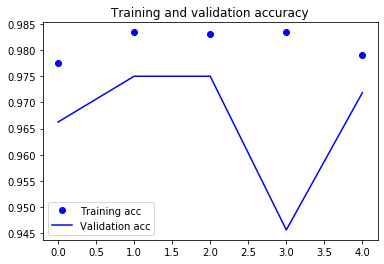

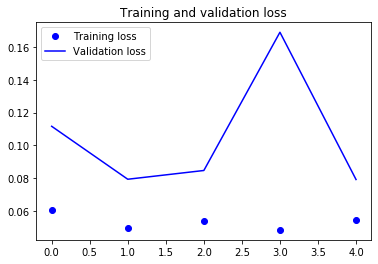

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

Собствено говоря мы наблюдаем процесс переобученияначиная примерно с 4-6 эпкохи. 

---

Далее по аналогичной схеме мы попробуем решить более сложную задачу (например мы будем искать восполение легких). Собственно сам датасет https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia 

In [6]:
base_dir = 'pneymania/chest_xray'

In [7]:
pneymania_test = os.path.join(base_dir, 'test')
pneymania_train = os.path.join(base_dir, 'train')
pneymania_val = os.path.join(base_dir, 'val')


In [8]:
pneymania_train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
pneymania_test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = pneymania_train_datagen.flow_from_directory(
       'pneymania/chest_xray/train',
        target_size=(256, 256),
        batch_size=32,

        class_mode='binary')
#у нас есть 2 класса. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 5216 images belonging to 2 classes.


In [10]:
test_generator = pneymania_test_datagen.flow_from_directory(
        'pneymania/chest_xray/test',
        target_size=(256, 256),
        batch_size=32,

        class_mode='binary')
#у нас есть 2 класса . Мы хотим их преобразовать в пакеты готовых тензеров.

Found 624 images belonging to 2 classes.


In [11]:
model_pneymania = models.Sequential()
model_pneymania.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model_pneymania.add(layers.MaxPooling2D((2, 2)))
model_pneymania.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_pneymania.add(layers.MaxPooling2D((2, 2)))
model_pneymania.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_pneymania.add(layers.MaxPooling2D((2, 2)))



model_pneymania.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_pneymania.add(layers.MaxPooling2D((2, 2)))
model_pneymania.add(layers.Flatten())
model_pneymania.add(layers.Dropout(0.5))
model_pneymania.add(layers.Dense(512, activation='relu'))
model_pneymania.add(layers.Dense(1, activation='sigmoid'))

model_pneymania.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
history = model_pneymania.fit_generator(
      
      train_generator,
#      steps_per_epoch=100, # это много
      epochs=30,
      validation_data=test_generator,
#      validation_steps=50,#это много 50 более чем достаточно
#       callbacks=callbacks_list
)

Epoch 1/30
163/163 [==============================] - 152s 933ms/step - loss: 0.4392 - acc: 0.7945 - val_loss: 0.4293 - val_acc: 0.7981
Epoch 2/30
163/163 [==============================] - 144s 881ms/step - loss: 0.3389 - acc: 0.8495 - val_loss: 0.3799 - val_acc: 0.8301
Epoch 3/30
163/163 [==============================] - 144s 882ms/step - loss: 0.3142 - acc: 0.8587 - val_loss: 0.3698 - val_acc: 0.8381
Epoch 4/30
163/163 [==============================] - 144s 883ms/step - loss: 0.2913 - acc: 0.8733 - val_loss: 0.3487 - val_acc: 0.8462
Epoch 5/30
163/163 [==============================] - 144s 884ms/step - loss: 0.2778 - acc: 0.8825 - val_loss: 0.3374 - val_acc: 0.8574
Epoch 6/30
163/163 [==============================] - 144s 881ms/step - loss: 0.2721 - acc: 0.8821 - val_loss: 0.3326 - val_acc: 0.8750
Epoch 7/30
163/163 [==============================] - 144s 882ms/step - loss: 0.2594 - acc: 0.8892 - val_loss: 0.3195 - val_acc: 0.8750
Epoch 8/30
163/163 [============================

Модель можно и не обучать столько времени, просто ради интереса решил обучить и построить график.

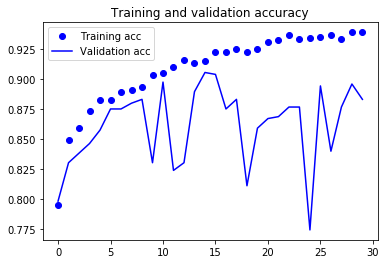

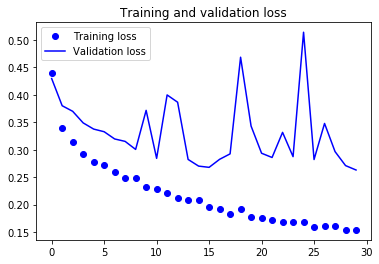

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [18]:
test_batches = pneymania_test_datagen.flow_from_directory("pneymania/chest_xray/test", model_pneymania.input_shape[1:3], shuffle=False,
                                        batch_size=8)
import pandas as pd
p = model_pneymania.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)

Found 624 images belonging to 2 classes.
78/78 [==============================] - 8s 99ms/step


In [20]:
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
#pre['pre'] = (pre[1]>0.5).apply(int)

In [24]:
pre

,0,filename,label
0,0.197500,NORMAL\IM-0001-0001.jpeg,0
1,0.024719,NORMAL\IM-0003-0001.jpeg,0
2,0.180540,NORMAL\IM-0005-0001.jpeg,0
3,0.081972,NORMAL\IM-0006-0001.jpeg,0
4,0.081101,NORMAL\IM-0007-0001.jpeg,0
...,...,...,...
619,0.999425,PNEUMONIA\person96_bacteria_465.jpeg,1
620,0.998945,PNEUMONIA\person96_bacteria_466.jpeg,1
621,0.975605,PNEUMONIA\person97_bacteria_468.jpeg,1
622,0.602131,PNEUMONIA\person99_bacteria_473.jpeg,1


In [42]:
print(len(pre[(pre[0]<0.5) & (pre['label']==1)])) #ошибка
print(len(pre[(pre[0]>0.5) & (pre['label']==1)]))
print(len(pre[(pre[0]<0.5) & (pre['label']==0)]))
print(len(pre[(pre[0]>0.5) & (pre['label']==0)])) #ошибка
#pd.crosstab(pre[0], pre['label'], normalize=True)

23
367
184
50


Попробуем для классифкации использовать уже обученную модель с последующем переобучением.

In [49]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
              #    input_shape=(299, 299, 3),
                  pooling='avg')

In [50]:
conv_base.trainable = True
#conv_base.non_trainable_variables
#set_trainable = False
#for layer in conv_base.layers:
#    if layer.name == 'conv2d_4':
#        set_trainable = True
#    if set_trainable:
#        layer.trainable = True
#    else:
#        layer.trainable = False
#conv_base.summary()

In [51]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [52]:
checkpointer = ModelCheckpoint(filepath='top-weights.hdf5', verbose=1, save_best_only=True)

In [53]:
xception_model = models.Sequential()



xception_model.add(conv_base)    
xception_model.add(layers.BatchNormalization())
xception_model.add(Dense(256, activation='relu'))
xception_model.add(Dropout(0.5))

xception_model.add(Dense(10, activation='relu'))
xception_model.add(Dropout(0.5))    

xception_model.add(Dense(1, activation='sigmoid'))

xception_model.compile(Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
SeparableConv2D

In [ ]:
#еще 1 модель...

In [75]:

test2_model = models.Sequential()



test2_model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), activation="relu", strides=(4, 4),
                        input_shape=(224, 224, 3)))
test2_model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
test2_model.add(layers.Conv2D(filters=256, kernel_size=(11, 11), activation="relu", strides=(4, 4)))
test2_model.add(layers.Dropout(0.4))
test2_model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
test2_model.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.Dropout(0.4))
test2_model.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

test2_model.add(layers.Flatten())
test2_model.add(layers.Dense(4096, activation='relu'))



test2_model.add(layers.BatchNormalization())
test2_model.add(layers.Dropout(0.4))
test2_model.add(layers.Dense(4096, activation='relu'))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.Dropout(0.4))

test2_model.add(layers.Dense(1000, activation='relu'))

test2_model.add(layers.Dropout(0.4))
test2_model.add(layers.Dense(2, activation="softmax"))

'''
test2_model.add(layers.Conv2D(64, (3, 3), activation="relu"
                        ))
test2_model.add(layers.MaxPooling2D((2, 2)))


test2_model.add(layers.SeparableConv2D(128, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.SeparableConv2D(128, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.MaxPooling2D((2, 2)))
test2_model.add(layers.SeparableConv2D(256, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(256, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(256, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(256, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.MaxPooling2D((2, 2)))
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.MaxPooling2D((2, 2)))
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.SeparableConv2D(512, (3, 3), activation="relu", padding="same"))
test2_model.add(layers.MaxPooling2D((2, 2)))
test2_model.add(layers.Flatten())

test2_model.add(layers.Dense(1024, activation='relu'))
test2_model.add(layers.Dropout(0.5))
test2_model.add(layers.Dense(1024, activation='relu'))
test2_model.add(layers.BatchNormalization())
test2_model.add(layers.Dropout(0.2))
test2_model.add(layers.Dense(2, activation="softmax"))

'''



test2_model.compile(Adam(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
test2_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 5, 5, 256)         2973952   
_________________________________________________________________
dropout_19 (Dropout)         (None, 5, 5, 256)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 2, 2, 256)         590080    
_________________________________________________________________
dropout_20 (Dropout)         (None, 2, 2, 256)        

In [77]:
pneymania_train_datagen = ImageDataGenerator(rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
  
    zoom_range=0.2,
    horizontal_flip=True)
                 
pneymania_test_datagen = ImageDataGenerator(rescale=1. / 255)


In [78]:
train_generator = pneymania_train_datagen.flow_from_directory(
       'pneymania/chest_xray/train',
        test2_model.input_shape[1:3], #меняем размер 
        batch_size=16,
        shuffle=True,seed=1
        # Since we use binary_crossentropy loss, we need binary labels
        )
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 5216 images belonging to 2 classes.


In [79]:
test_generator = pneymania_test_datagen.flow_from_directory(
        'pneymania/chest_xray/test',
        test2_model.input_shape[1:3],
        batch_size=16,
        shuffle=True,seed=1
        # Since we use binary_crossentropy loss, we need binary labels
        )
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 624 images belonging to 2 classes.


In [80]:
valid_generator = pneymania_test_datagen.flow_from_directory(
        'pneymania/chest_xray/val',
         test2_model.input_shape[1:3],
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 16 images belonging to 2 classes.


In [81]:
checkpointer = ModelCheckpoint(filepath='top-weights.hdf5', verbose=1, save_best_only=True)

In [82]:
history = test2_model.fit_generator(
      train_generator,
      steps_per_epoch=300, # это много
       epochs=10,
       validation_data=test_generator,
      validation_steps=100,#это много 50 более чем достаточно
       callbacks=[checkpointer]
      
)

Epoch 1/10
299/300 [============================>.] - ETA: 0s - loss: 3.5507 - acc: 0.7057
Epoch 00001: val_loss improved from inf to 2.71286, saving model to top-weights.hdf5
300/300 [==============================] - 147s 489ms/step - loss: 3.5434 - acc: 0.7054 - val_loss: 2.7129 - val_acc: 0.5619
Epoch 2/10
299/300 [============================>.] - ETA: 0s - loss: 2.3371 - acc: 0.7107
Epoch 00002: val_loss improved from 2.71286 to 0.87812, saving model to top-weights.hdf5
300/300 [==============================] - 201s 669ms/step - loss: 2.3353 - acc: 0.7104 - val_loss: 0.8781 - val_acc: 0.6231
Epoch 3/10
299/300 [============================>.] - ETA: 0s - loss: 1.5215 - acc: 0.7205
Epoch 00003: val_loss did not improve from 0.87812
300/300 [==============================] - 175s 585ms/step - loss: 1.5177 - acc: 0.7210 - val_loss: 3.8087 - val_acc: 0.4969
Epoch 4/10
299/300 [============================>.] - ETA: 0s - loss: 1.2593 - acc: 0.7207
Epoch 00004: val_loss did not improv

In [54]:
xception_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                2570      
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                

In [55]:
pneymania_train_datagen = ImageDataGenerator(rescale=1. / 255, rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
  
    zoom_range=0.2,
    horizontal_flip=True)
                 
pneymania_test_datagen = ImageDataGenerator(rescale=1. / 255)

In [56]:
train_generator = pneymania_train_datagen.flow_from_directory(
       'pneymania/chest_xray/train',
        target_size=(64, 64), #меняем размер 
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 5216 images belonging to 2 classes.


In [57]:
test_generator = pneymania_test_datagen.flow_from_directory(
        'pneymania/chest_xray/test',
         target_size=(64, 64),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 624 images belonging to 2 classes.


In [58]:
valid_generator = pneymania_test_datagen.flow_from_directory(
        'pneymania/chest_xray/val',
          target_size=(64, 64),
        batch_size=8,
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)
#у нас есть 2 класса - маишны и не машины. Мы хотим их преобразовать в пакеты готовых тензеров.

Found 16 images belonging to 2 classes.


In [59]:
history = xception_model.fit_generator(
      train_generator,
       steps_per_epoch=500, # это много
       epochs=10,
       validation_data=test_generator,
#      validation_steps=20,#это много 50 более чем достаточно
       callbacks=[checkpointer]
      
)

Epoch 1/10
499/500 [============================>.] - ETA: 0s - loss: 0.4142 - acc: 0.7796
Epoch 00001: val_loss improved from inf to 0.46586, saving model to top-weights.hdf5
500/500 [==============================] - 118s 236ms/step - loss: 0.4141 - acc: 0.7796 - val_loss: 0.4659 - val_acc: 0.7788
Epoch 2/10
499/500 [============================>.] - ETA: 0s - loss: 0.3836 - acc: 0.7992
Epoch 00002: val_loss did not improve from 0.46586
500/500 [==============================] - 113s 225ms/step - loss: 0.3832 - acc: 0.7995 - val_loss: 3.7157 - val_acc: 0.3750
Epoch 3/10
499/500 [============================>.] - ETA: 0s - loss: 0.3728 - acc: 0.8139
Epoch 00003: val_loss did not improve from 0.46586
500/500 [==============================] - 115s 229ms/step - loss: 0.3727 - acc: 0.8139 - val_loss: 3.2705 - val_acc: 0.3750
Epoch 4/10
499/500 [============================>.] - ETA: 0s - loss: 0.3533 - acc: 0.8279
Epoch 00004: val_loss did not improve from 0.46586
500/500 [==============

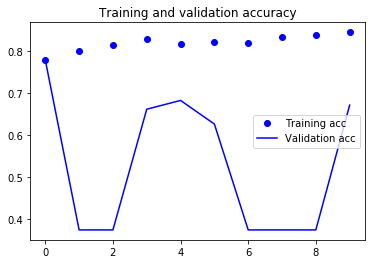

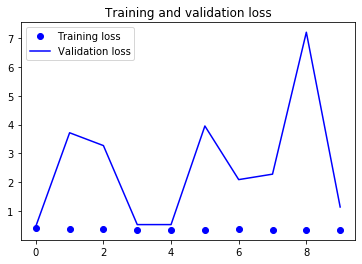

In [61]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [62]:
#test_batches = pneymania_test_datagen.flow_from_directory("pneymania/chest_xray/test", xception_model.input_shape[1:3], shuffle=False,
#                                        batch_size=8)
import pandas as pd
p = xception_model.predict_generator(test_generator, verbose=True)
pre = pd.DataFrame(p)

39/39 [==============================] - 7s 183ms/step


In [64]:
pre["filename"] = test_generator.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
#pre['pre'] = (pre[1]>0.5).apply(int)

In [65]:
pre

,0,filename,label
0,0.982783,NORMAL\IM-0001-0001.jpeg,0
1,0.999998,NORMAL\IM-0003-0001.jpeg,0
2,0.999990,NORMAL\IM-0005-0001.jpeg,0
3,0.999996,NORMAL\IM-0006-0001.jpeg,0
4,0.994521,NORMAL\IM-0007-0001.jpeg,0
...,...,...,...
619,0.988674,PNEUMONIA\person96_bacteria_465.jpeg,1
620,0.524099,PNEUMONIA\person96_bacteria_466.jpeg,1
621,0.814933,PNEUMONIA\person97_bacteria_468.jpeg,1
622,0.995337,PNEUMONIA\person99_bacteria_473.jpeg,1


In [66]:
print(str(len(pre[(pre[0]<0.5) & (pre['label']==1)])) +' ошибка') #ошибка
print(len(pre[(pre[0]>0.5) & (pre['label']==1)]))
print(len(pre[(pre[0]<0.5) & (pre['label']==0)]))
print(str(len(pre[(pre[0]>0.5) & (pre['label']==0)]))+' ошибка') #ошибка
#pd.crosstab(pre[0], pre['label'], normalize=True)

28 ошибка
362
19
215 ошибка


In [71]:
import numpy as np
from tensorflow import set_random_seed
os.environ['PYTHONHASHSEED'] = "0"
np.random.seed(1)
set_random_seed(2)

In [8]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

New_model = models.Sequential()
New_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",
                 input_shape=(64,64,1)))
New_model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same"))
New_model.add(BatchNormalization())
New_model.add(MaxPooling2D(pool_size=(2,2)))
New_model.add(Dropout(rate=0.25))
New_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
New_model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="same"))
New_model.add(BatchNormalization())
New_model.add(MaxPooling2D(pool_size=(2,2)))
New_model.add(Dropout(rate=0.25))
New_model.add(Flatten())
New_model.add(Dense(1024,activation="relu"))
New_model.add(BatchNormalization())
New_model.add(Dropout(rate=0.4))
New_model.add(Dense(2, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [73]:
New_model.compile(Adam(lr=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

In [76]:
gen = ImageDataGenerator()
train_batches = gen.flow_from_directory("pneymania/chest_xray/train",New_model.input_shape[1:3],color_mode="grayscale",shuffle=True,seed=1,
                                        batch_size=16)
valid_batches = gen.flow_from_directory("pneymania/chest_xray/val", New_model.input_shape[1:3],color_mode="grayscale", shuffle=True,seed=1,
                                        batch_size=16)
test_batches = gen.flow_from_directory("pneymania/chest_xray/test", New_model.input_shape[1:3], shuffle=False,
                                       color_mode="grayscale", batch_size=8)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [79]:
history = New_model.fit_generator(train_batches,validation_data=valid_batches,epochs=10)

Epoch 1/10
326/326 [==============================] - 49s 149ms/step - loss: 0.1007 - acc: 0.9664 - val_loss: 1.9257 - val_acc: 0.5625
Epoch 2/10
326/326 [==============================] - 48s 147ms/step - loss: 0.0808 - acc: 0.9712 - val_loss: 0.1897 - val_acc: 0.8750
Epoch 3/10
326/326 [==============================] - 48s 147ms/step - loss: 0.0701 - acc: 0.9720 - val_loss: 0.7770 - val_acc: 0.6250
Epoch 4/10
326/326 [==============================] - 48s 147ms/step - loss: 0.0715 - acc: 0.9734 - val_loss: 2.3344 - val_acc: 0.5000
Epoch 5/10
326/326 [==============================] - 48s 147ms/step - loss: 0.0701 - acc: 0.9758 - val_loss: 0.0717 - val_acc: 1.0000
Epoch 6/10
326/326 [==============================] - 48s 146ms/step - loss: 0.0678 - acc: 0.9762 - val_loss: 2.0364 - val_acc: 0.9375
Epoch 7/10
326/326 [==============================] - 48s 147ms/step - loss: 0.0603 - acc: 0.9795 - val_loss: 1.3411 - val_acc: 0.6250
Epoch 8/10
326/326 [==============================] - 4

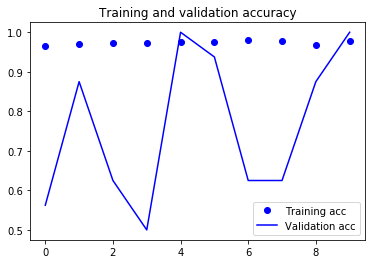

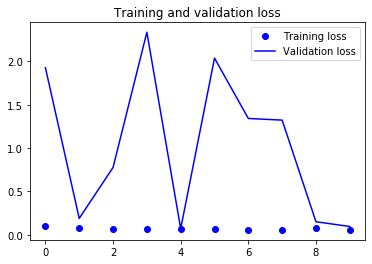

In [80]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show();

In [83]:
import pandas as pd
p = New_model.predict_generator(test_batches, verbose=True)
pre = pd.DataFrame(p)

78/78 [==============================] - 5s 64ms/step


In [87]:
pre["filename"] = test_batches.filenames
pre["label"] = (pre["filename"].str.contains("PNEUMONIA")).apply(int)
pre['pre'] = (pre[1]>0.5).apply(int)

In [88]:
pre

,0,1,filename,label,pre
0,0.805074,0.194926,NORMAL\IM-0001-0001.jpeg,0,0
1,0.013439,0.986561,NORMAL\IM-0003-0001.jpeg,0,1
2,0.646562,0.353438,NORMAL\IM-0005-0001.jpeg,0,0
3,0.231027,0.768973,NORMAL\IM-0006-0001.jpeg,0,1
4,0.024376,0.975624,NORMAL\IM-0007-0001.jpeg,0,1
...,...,...,...,...,...
619,0.000008,0.999992,PNEUMONIA\person96_bacteria_465.jpeg,1,1
620,0.000321,0.999679,PNEUMONIA\person96_bacteria_466.jpeg,1,1
621,0.000001,0.999999,PNEUMONIA\person97_bacteria_468.jpeg,1,1
622,0.000566,0.999434,PNEUMONIA\person99_bacteria_473.jpeg,1,1


In [90]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score
roc_auc_score(pre["label"],pre[1])

0.9010574183651107

Выводы. 1 примитивная модель зачастую показывает приемлимый результат из коробки. <br> В случае если 80-85% точность достаточна. <br>Заранее обученные модели хорошо (как правило) работают с изображениями на которых они были обучены и плохо на новых изображениях.<br> Обучить модель различать машину и слона намного проще чем искать восполение легких.  